# Predicting Customer Churn - MTN Africa Dataset

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question
Using the current customers' behaviour and traits is MTN able to determine the probability of customer churn?

### b) Defining the Metric for Success

1. The project should be able to identify characteristics of customers who churn.
2. Using these traits, the project should be able to build a model with existing customer data that can be used by MTN Africa to predict the customers who are likely to churn. (This will help the business to focus efforts on these specific customers hence higher retention)

### c) Understanding the Context 

As a Data Scientist working for MTN Africa, a leading Telecommunications Company in Africa, you are tasked to analyze relevant customer data and develop a solution that will help determine whether a customer will churn.

Customer dataset has already been provided which you are to use to iplement your solution. In addition, you will be expected to help relevant stakeholders understand the potential of your developed solution.

### d) Recording the Experimental Design

Defining the Research Question
Data Importation
Data Exploration
Data Cleaning
Data Analysis (Univariate and Bivariate)
Data Preparation
Data Modeling
Model Evaluation
Challenging your Solution
Recommendations / Conclusion 


1. Business Understanding : Understanding and assessing the business situation and goals in order to define the research question.<br>

2. Data Understanding and Exploration 
  * Prerequisites
     * Load requisite libraries 
     * Load and preview datasets.
  * Data quality assessment (Accuracy, Completeness, Consistency, Currency, Relevance, Validity and Uniqueness).     
   <br>

3. Data Preparation and Analysis
  * Select the essential data relevant to the business problem).
  * Data cleaning
  * Data transformation (merging datasets, reformatting fields, filtering records, etc.) and enrichment (feature engineering & tests for collinearity.)
   * Univariate & Bivariate Analysis

4. Data Modeling
  * Modeling technique selection
  * Model building & assessment
  
5. Solution Implementation & Reporting
  * Summarize findings - Comparative study of regression algorithms.
  * Provide Recommendations
  * Challenge the solution.

### e) Data Relevance
The dataset provided for this project is sourced from https://bit.ly/MTNTelcoDataset where each row represents a customer, each column contains customer’s attributes described on the column Metadata.

Dataset Glossary Download Link: https://bit.ly/3gTideq

## <font color='#2F4F4F'>2. Data Understanding & Exploration</font>

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

In [3]:
# read the glossary for the dataset for ease of understanding the features.

df_glossary = pd.read_csv('classification_analysis_glossary.csv')
df_glossary

,customer_feature,description
0,account_length,Age of account in months.
1,customer_id,Enterprise ID of the customer.
2,area_code,Area code.
3,international_plan,Rather or not the customer has an international calling plan.
4,voice_mail_plan,Rather or not the customer has a voice mail plan.
5,number_vmail_messages,Number of VM messages customer currently has on the server.
6,total_day_minutes,Customers total usage of day minutes in plan.
7,total_day_calls,Total number of calls customer has made during the day.
8,total_day_charge,How much the customer has been charged for day minutes.
9,total_eve_minutes,Total number of calls customer has made during the evening.


In [4]:
# load and preview dataset

df = pd.read_csv('call-center-data-QueryResult.csv')
df.sample(3)

,recordid,customer_id,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes_2,total_intl_calls_2,total_intl_charge,number_customer_service_calls,churn
7383,7384,313663411.0,68,510,False,9.6,2,True,30,122.9,93,20.89,233.5,91,19.85,199.5,144,8.98,9.6,2,2.59,2,False
10653,10654,43329655.0,110,415,False,11.7,4,False,0,135.1,109,22.97,205.2,99,17.44,166.3,119,7.48,11.7,4,3.16,1,False
4330,4331,17018490.0,172,510,False,12.7,7,False,0,169.8,123,28.87,183.1,94,15.56,395.0,72,17.77,12.7,7,3.43,2,False


In [5]:
# check dataset shape
df.shape

(12892, 23)

The dataset has 12,892 records and 23 variables. Having understood the structure of the dataset, we immediately determine that we do not need the record_id and the customer_id fields and so either drop them or re-read the data set.

In [6]:
# but before we drop the records we need to determine if there are indeed duplicated records in the dataset using the primary identifier.

df['customer_id'].nunique()

12892

In [7]:
# using the recordID

df['recordid'].nunique()

12892

In [8]:
# if we are to re-read the dataset without these, we would use
# df = pd.read_csv('call-center-data-QueryResult.csv', usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])

df.drop(columns = ['recordid', 'customer_id'], inplace = True)

In [9]:
# preview variable datatypes
df.dtypes

account_length                     int64
area_code                          int64
international_plan                  bool
total_intl_minutes               float64
total_intl_calls                   int64
voice_mail_plan                     bool
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes_2             float64
total_intl_calls_2                 int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               bool
dtype: object

With the exception of the 'international_plan', 'voice_mail_plan', and 'churn' variables which are boolean, this dataset is numerical.

In [10]:
# check for duplicates
df.duplicated().sum()

7892

In [11]:
# which are the duplicated records?

# which rows are duplicated?
duplicated_df = df[df.duplicated()]
duplicated_df

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes_2,total_intl_calls_2,total_intl_charge,number_customer_service_calls,churn
5000,128,415,False,10.0,3,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
5001,107,415,False,13.7,3,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
5002,137,415,False,12.2,5,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
5003,84,408,True,6.6,7,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
5004,75,415,True,10.1,3,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,25,415,False,12.6,5,False,0,134.3,98,22.83,202.3,109,17.20,195.9,100,8.82,12.6,5,3.40,2,False
12888,113,415,False,4.9,5,False,0,215.9,93,36.70,240.1,85,20.41,156.7,123,7.05,4.9,5,1.32,3,False
12889,88,415,False,11.4,4,True,31,181.6,91,30.87,213.2,120,18.12,207.8,104,9.35,11.4,4,3.08,1,False
12890,120,415,False,9.3,9,False,0,178.4,97,30.33,168.3,113,14.31,120.5,93,5.42,9.3,9,2.51,1,False


In [12]:
# are they all for customers who churned? who did not churn? or a mix of both?

duplicated_df['churn'].unique()

array([False,  True])

In [13]:
df = df.drop_duplicates()
df.shape

(5000, 21)

7,892 duplicated records exist in the dataset which we have proceeded to drop as they would interfere with the analysis. 

As a highlight, after deeper investigations we notice that these records have unique record IDs and Customer IDs, they are thus duplicates because the primary keys for the dataset have been dropped.

In [14]:
# check for missing values
df.isna().sum()

account_length                   0
area_code                        0
international_plan               0
total_intl_minutes               0
total_intl_calls                 0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes_2             0
total_intl_calls_2               0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

No missing values found. We will look at the duplicate columns as well as unique values in each variable just to be safe.

In [15]:
# Helper Method to check for duplicated columns

def getDuplicateColumns(df): 
  
    # Create an empty set 
    duplicateColumnNames = set() 
      
    # Iterate through all the columns  
    # of dataframe 
    for x in range(df.shape[1]): 
          
        # Take column at xth index. 
        col = df.iloc[:, x] 
          
        # Iterate through all the columns in 
        # DataFrame from (x + 1)th index to 
        # last index 
        for y in range(x + 1, df.shape[1]): 
              
            # Take column at yth index. 
            otherCol = df.iloc[:, y] 
              
            # Check if two columns at x & y 
            # index are equal or not, 
            # if equal then adding  
            # to the set 
            if col.equals(otherCol): 
                duplicateColumnNames.add(df.columns.values[y]) 
                  
    # Return list of unique column names  
    # whose contents are duplicates. 
    return list(duplicateColumnNames) 

In [16]:
# check for duplicate columns in the dataset.

duplicated_cols = getDuplicateColumns(df)

if len(duplicated_cols) > 0:
    print('Duplicate columns found: \n')
    print(duplicated_cols)
else:
    print('No duplicate coumns found in the dataset.')

Duplicate columns found: 

['total_intl_calls_2', 'total_intl_minutes_2']


*The procedure above checks for duplicate columns in the dataset and there appears to be two duplicated columns. We will proceed to list the unique values in the columns for a confirmation.*

In [17]:
columns = df.columns

for col in columns:
    print("Variable:", col)
    print("Number of unique values:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: account_length
Number of unique values: 218
[101 137 103  99 108 117  63  94 138 128 113 140 102  60  96 178  75 106
 158 111  92  42  69  76  72 115  68  97  90  73  54 161 125 194 141  98
 110  70  66  79  61  77 105 159  83  93 163 169  57  85 132 190  39  84
  71 114 135  82  64 112 166 120 187 100  45  43  52  74  40  56 133 119
 131 118 107 109 127  33 145  47  53 148  55 143 170  65 157  89  91 104
 130  80 146  29  78 185 144  59 139  12 150 156  17 176  95 136 165 149
 124  87  51 126  62  48  58  81  36 177  25 171 122  44 167  41 184  88
 151 160 152  49  13 142   3  23  19 154 116 173  24  15  86 147  21 174
 162 186  14   7   1  18  20  11 192 121 134  67 164 180  35 155  32 123
 182 129  38  37  50  27 188 175   5  26   4  31 193 238  28 195 153 201
 216 183 168 222 232 233  22  46  34   8 217   2 200 172  16  30 202 181
  10   6 179 208 215 199 196 209 224 189 243 205   9 210 212 197 225 191
 204 221]

Variable: area_code
Number of unique values: 3
[510 408 415

Let's preview the duplicated columns (and the primary columns); 'total_intl_minutes' and 'total_intl_minutes_2', and 'total_intl_calls' and 'total_intl_calls_2'.

In [18]:
# previewing the possibly duplicated columns
df[['total_intl_minutes', 'total_intl_calls', 'total_intl_minutes_2', 'total_intl_calls_2']]

,total_intl_minutes,total_intl_calls,total_intl_minutes_2,total_intl_calls_2
0,10.6,3,10.6,3
1,9.5,7,9.5,7
2,13.7,6,13.7,6
3,15.7,2,15.7,2
4,7.7,4,7.7,4
...,...,...,...,...
4995,9.9,6,9.9,6
4996,9.6,4,9.6,4
4997,14.1,6,14.1,6
4998,5.0,10,5.0,10


The last two columns appear to be complete copies of the first two. We will confirm this so that we do not blindly drop them.

In [19]:
# selecting the total number of records where the values of 'total_intl_minutes' are equal to the values of 
# 'total_intl_minutes_2', AND the values of 'total_intl_calls' are equal to the values of 'total_intl_calls_2'
df[(df['total_intl_minutes'] == df['total_intl_minutes_2']) & (df['total_intl_calls'] == df['total_intl_calls_2'])].count()

account_length                   5000
area_code                        5000
international_plan               5000
total_intl_minutes               5000
total_intl_calls                 5000
voice_mail_plan                  5000
number_vmail_messages            5000
total_day_minutes                5000
total_day_calls                  5000
total_day_charge                 5000
total_eve_minutes                5000
total_eve_calls                  5000
total_eve_charge                 5000
total_night_minutes              5000
total_night_calls                5000
total_night_charge               5000
total_intl_minutes_2             5000
total_intl_calls_2               5000
total_intl_charge                5000
number_customer_service_calls    5000
churn                            5000
dtype: int64

We see that the columns are indeed duplicates so we can safely drop them.

In [20]:
df = df.drop(columns = ['total_intl_minutes_2', 'total_intl_calls_2'])
df.shape

(5000, 19)

In [75]:
# Confirm duplication of columns.

duplicated_cols = getDuplicateColumns(df)

if len(duplicated_cols) > 0:
    print('Duplicate columns found: \n')
    print(duplicated_cols)
else:
    print('No duplicate columns found in the dataset.')

No duplicate columns found in the dataset.


Another anomaly noted is that where there are records of 'total_intl_minutes', 'total_int_calls', and 'total_intl_charge' when 'international_plan' is False.

In [21]:
df[(df['international_plan'] == False) & ((df['total_intl_minutes'] > 0) | (df['total_intl_calls'] > 0) |
                                         df['total_intl_charge'] > 0)]

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,False,10.6,3,False,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,False
1,137,510,False,9.5,7,False,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,False
2,103,408,False,13.7,6,True,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,False
3,99,415,False,15.7,2,False,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,False
4,108,415,False,7.7,4,False,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,79,415,False,11.8,5,False,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,3.19,2,False
4995,192,415,False,9.9,6,True,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,2.67,2,False
4996,68,415,False,9.6,4,False,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,2.59,3,False
4997,28,510,False,14.1,6,False,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,3.81,2,False


In [ ]:
df.international_plan.value_counts()

False    4527
True      473
Name: international_plan, dtype: int64

*Much as we'd like to remove these invalid variables, doing so would result in a huge loss of data. We will therefore leave them as is, but flag them for future work. It could also have meant that the customers do not have the Int'l callng plan but proceeded to call anyways.*

We will check to confirm that there are no 'number_vmail_messages' when 'voice_mail_plan' is set to False.

In [22]:
df[(df['voice_mail_plan'] == False) & (df['number_vmail_messages'] > 0)]

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn


After confirming this, we can now drop the 'voice_mail_plan' column.

In [23]:
df.drop(columns = ['voice_mail_plan'], inplace = True)

In [24]:
df.dtypes

account_length                     int64
area_code                          int64
international_plan                  bool
total_intl_minutes               float64
total_intl_calls                   int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               bool
dtype: object

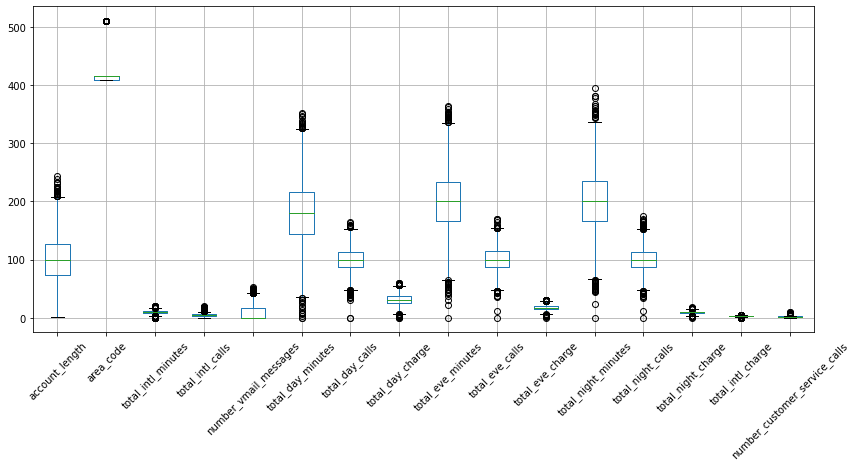

In [25]:
# looking for outliers
num_cols = df.columns.to_list()
num_cols.remove('international_plan')
num_cols.remove('churn')

plt.figure(figsize = (14, 6))
df.boxplot(num_cols)
plt.xticks(rotation = 45)
plt.show()

We see that all the remaining variables have outliers, which we will not drop.

In [27]:
# save the data set to a clean CSV file for permanency.

df.to_csv('call_center_clean.csv', index = False)


In [28]:
# read the shaped dataset for downstream analysis.
df = pd.read_csv('call_center_clean.csv')
df.head()

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,False,10.6,3,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,False
1,137,510,False,9.5,7,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,False
2,103,408,False,13.7,6,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,False
3,99,415,False,15.7,2,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,False
4,108,415,False,7.7,4,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,False


## <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Univariate Analysis

In [29]:
# get the summary statistics
df.describe()

,account_length,area_code,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,10.261780,4.435200,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,2.771196,1.570400
std,39.69456,42.209182,2.761396,2.456788,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,8.500000,3.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,2.300000,1.000000
50%,100.00000,415.000000,10.300000,4.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,2.780000,1.000000
75%,127.00000,415.000000,12.000000,6.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,3.240000,2.000000
max,243.00000,510.000000,20.000000,20.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,5.400000,9.000000


415    2495
408    1259
510    1246
Name: area_code, dtype: int64


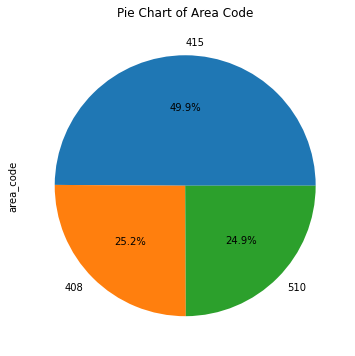

In [30]:
print(df.area_code.value_counts())

plt.figure(figsize = (6, 6))
df.area_code.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Pie Chart of Area Code')
plt.show()

Area Code 415 consists of almost half of the area codes in this dataset. Area Code 510 very slightly outnumbers Area Code 408.

False    4527
True      473
Name: international_plan, dtype: int64


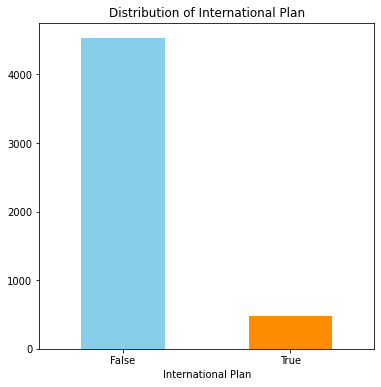

In [31]:
print(df.international_plan.value_counts())

plt.figure(figsize = (6, 6))
df.international_plan.value_counts().plot(kind = 'bar', rot = 0, color = ['skyblue', 'darkorange'])
plt.title('Distribution of International Plan')
plt.xlabel('International Plan')
plt.show()

Very few of the customers are subscribed to an international plan.

1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: number_customer_service_calls, dtype: int64


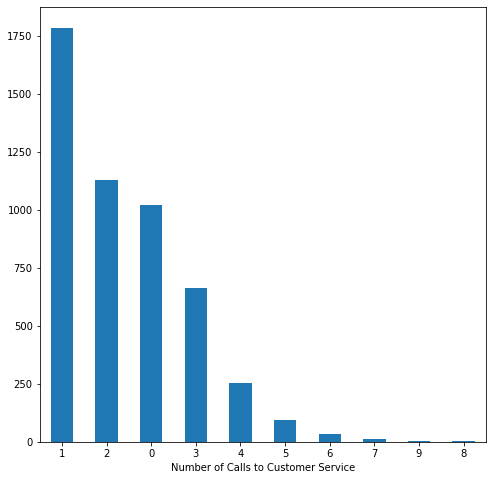

In [32]:
print(df.number_customer_service_calls.value_counts())

plt.figure(figsize = (8, 8))
df.number_customer_service_calls.value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel("Number of Calls to Customer Service")
plt.show()

*Most customers made exactly 1 call to customer service followed by those who made 2 calls, and then those who made 0 calls. Those who made more than 5 calls make up the minority.*

False    4293
True      707
Name: churn, dtype: int64


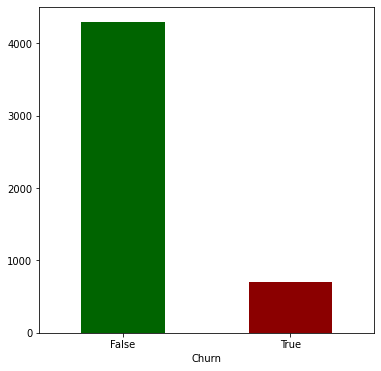

In [33]:
print(df.churn.value_counts())

plt.figure(figsize = (6, 6))
df.churn.value_counts().plot(kind ='bar', rot = 0, color = ['darkgreen', 'darkred'])
plt.xlabel("Churn")
plt.show()

Majority of the customers in this dataset have not churned, thereby making this dataset very biased.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

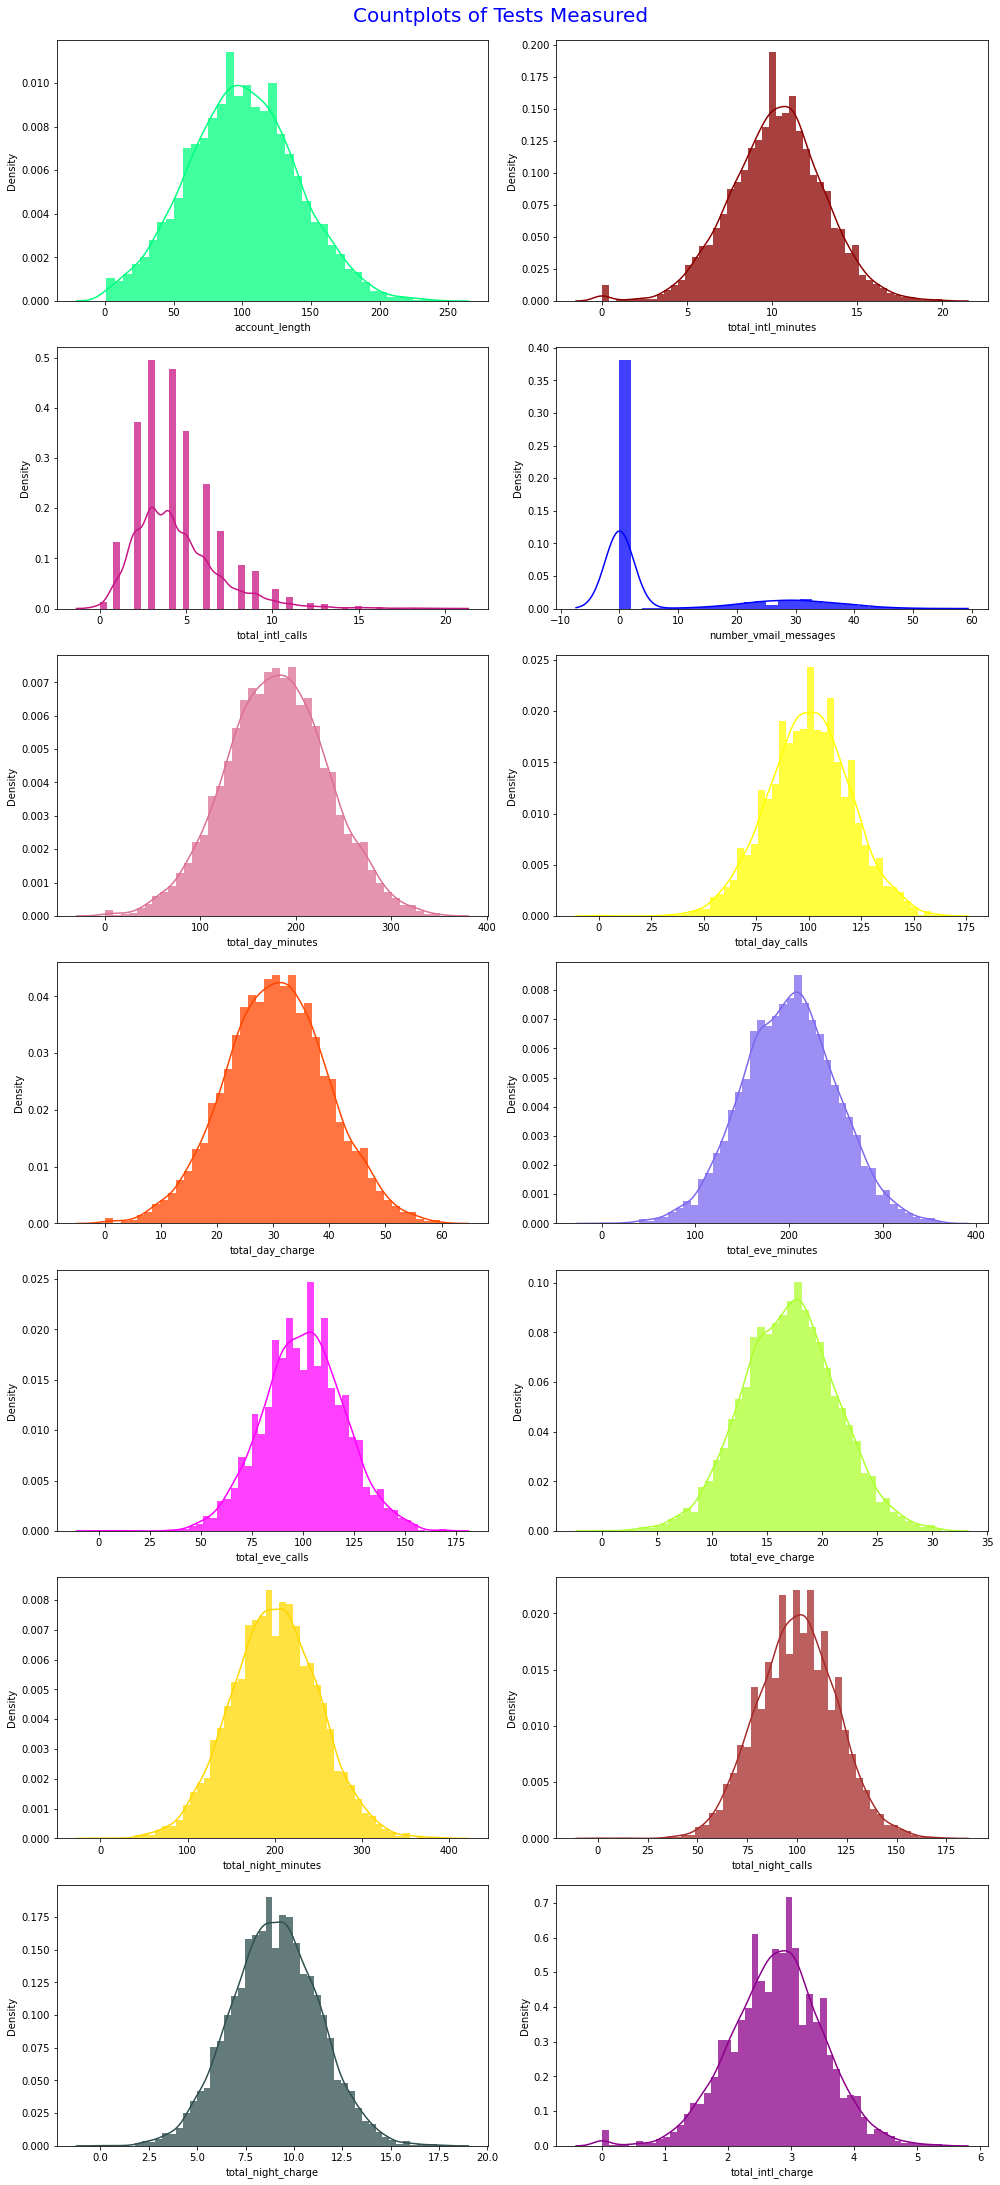

In [34]:
# plotting the histograms of all our numerical variables with the
# exception of 'area_code' and 'number_customer_service_calls'
num_cols.remove('area_code')
num_cols.remove('number_customer_service_calls')

fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (14, 30))
plt.suptitle('Countplots of Tests Measured', fontsize = 20, y = 1.01, color = 'blue')

colors = ['#00FF7F', '#8B0000', '#C71585', '#0000FF', '#DB7093', '#FFFF00', '#FF4500',
          '#7B68EE', '#FF00FF', '#ADFF2F', '#FFD700', '#A52A2A', '#2F4F4F', '#8B008B']
for ax, column, color in zip(axes.flatten(), num_cols, colors):
    sns.distplot(df[column], ax = ax, color = color, hist_kws = dict(alpha = 0.75))
    
plt.tight_layout()

Majority of the numerical variables have normal distributions. Apart from having most of its values in the 0-5 bin, the 'number_vmail_messages' variable appears to be normally distributed. The 'total_intl_calls' variable is skewed to the right and is not continuous.

### 3.2 Bivariata Analysis

We will make 'churn' our target variable and look at how the other variables relate to it.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


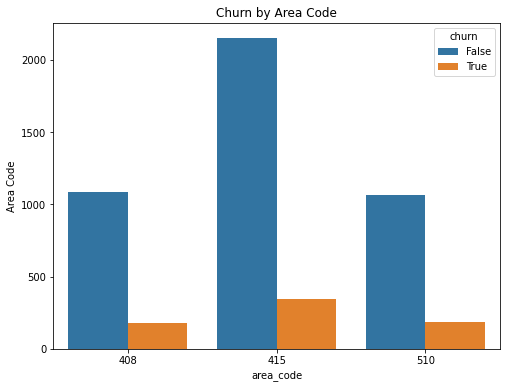

In [35]:
# churn by area code
plt.figure(figsize = (8, 6))
churn_area_code = sns.countplot('area_code', hue = 'churn', data = df)
churn_area_code.set(title = "Churn by Area Code", ylabel = 'Area Code')
plt.show()

Area code 415 reports the highest churn rates.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


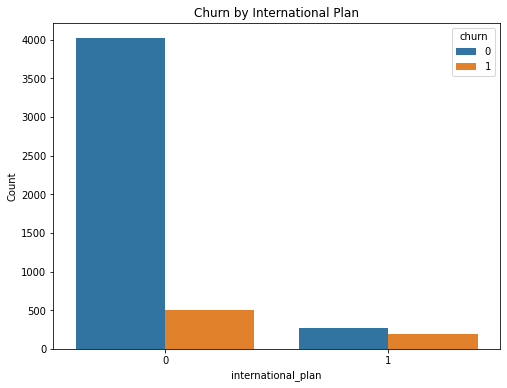

In [72]:
# churn by international plan
plt.figure(figsize = (8, 6))
churn_area_code = sns.countplot('international_plan', hue = 'churn', data = df)
churn_area_code.set(title = "Churn by International Plan", ylabel = 'Count')
plt.show()

Those without international plans churned more than those with international plans.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


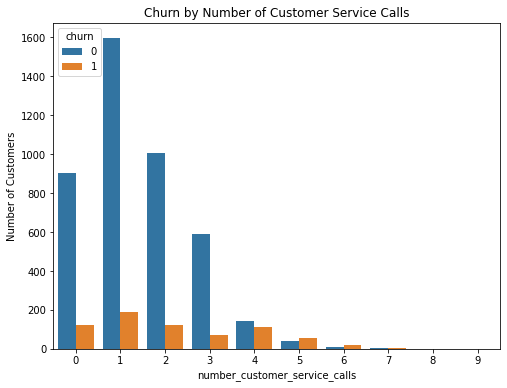

In [73]:
# churn by number of customer service calls
plt.figure(figsize = (8, 6))
churn_area_code = sns.countplot('number_customer_service_calls', hue = 'churn', data = df)
churn_area_code.set(title = "Churn by Number of Customer Service Calls",
                    ylabel = 'Number of Customers')
plt.show()

The interesting thing to note here is that those who made 0 or 2 calls to customer service churned at around the same rate. Similarly, those who made more than 3 calls reported high churn rates.

### 3.3 Feature Engineering & Test for Multicollinearity

Before we can carry out the test for multicollinearity (a requirement for logistic regression), we need to convert the values of 'international_plan' and 'churn' to binary.

In [41]:
df['international_plan'] = df['international_plan'].replace({False : 0, True : 1})
df['churn'] = df['churn'].replace({False : 0, True : 1})
df.head()

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,0,10.6,3,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,0
1,137,510,0,9.5,7,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,0
2,103,408,0,13.7,6,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,0
3,99,415,0,15.7,2,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,0
4,108,415,0,7.7,4,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,0


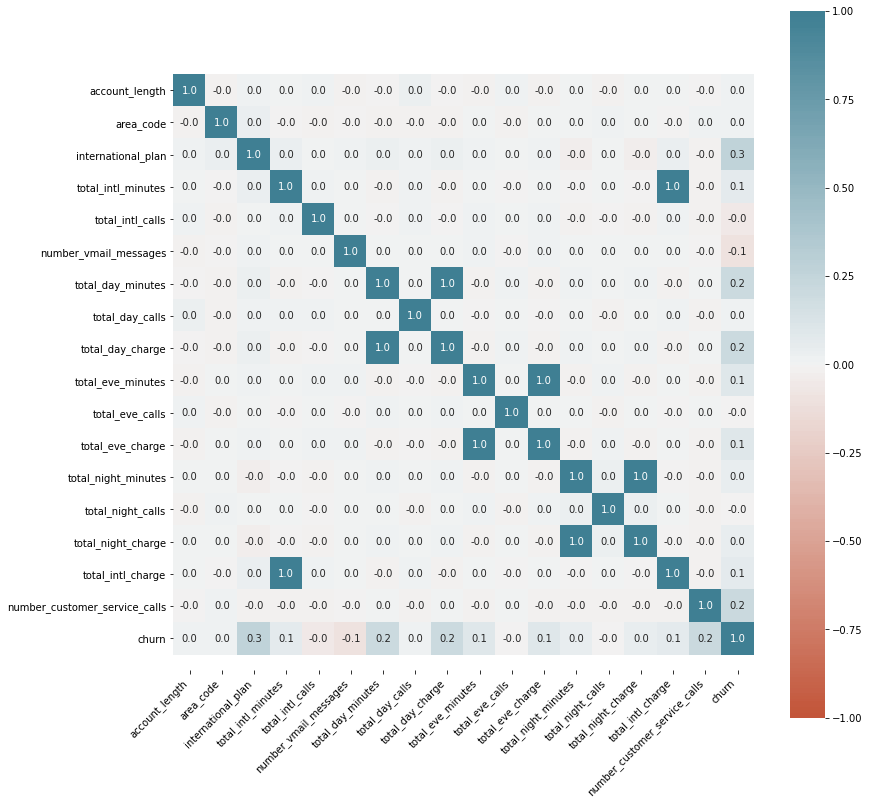

In [43]:
# checking the correlations between the numerical variables
corr= df.corr()

# plotting the correlations onto a heatmap
plt.figure(figsize=(13, 13))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True,
    fmt='.1f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

We see some perfect correlations between the following variables:
- 'total_day_minutes' and 'total_day_charge'
- 'total_eve_minutes' and 'total_eve_charge'
- 'total_night_minutes' and 'total_night_charge'
- 'total_intl_minutes' and 'total_intl_charge'

We will drop the minutes.

In [44]:
# drop the columns with minutes, e.g., 'total_day_minutes', etc.

df.drop(columns=['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'], axis=1, inplace=True)

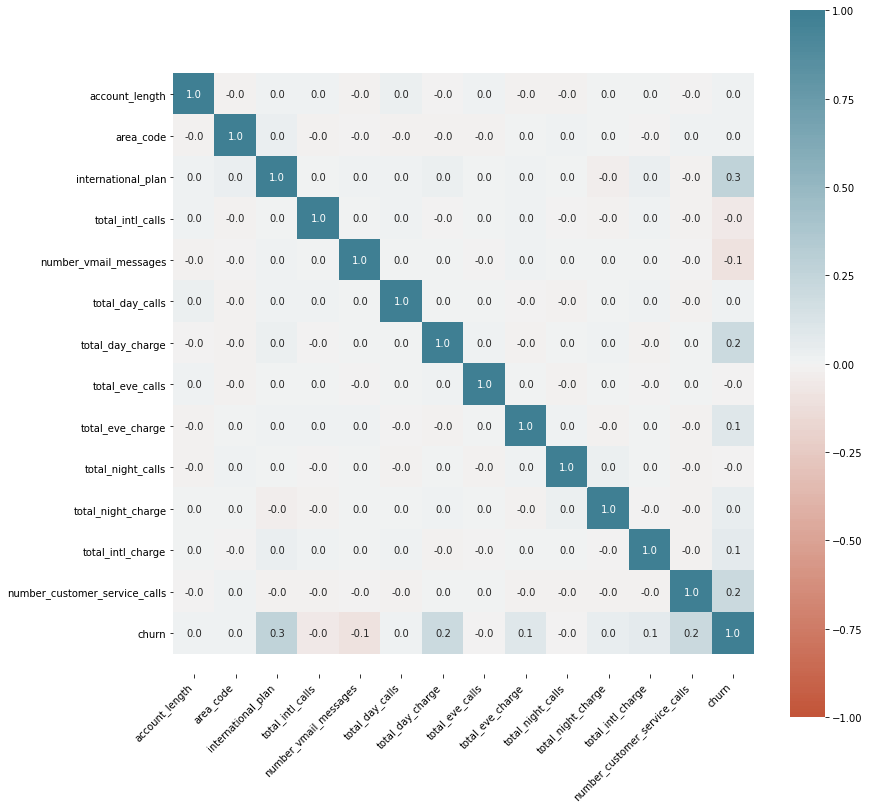

In [45]:
# checking the correlations between the numerical variables
corr= df.corr()

# plotting the correlations onto a heatmap
plt.figure(figsize=(13, 13))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True,
    fmt='.1f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

We will then check the Variance Inflation Factor (VIF) scores to ensure there is no high multicollinearity.

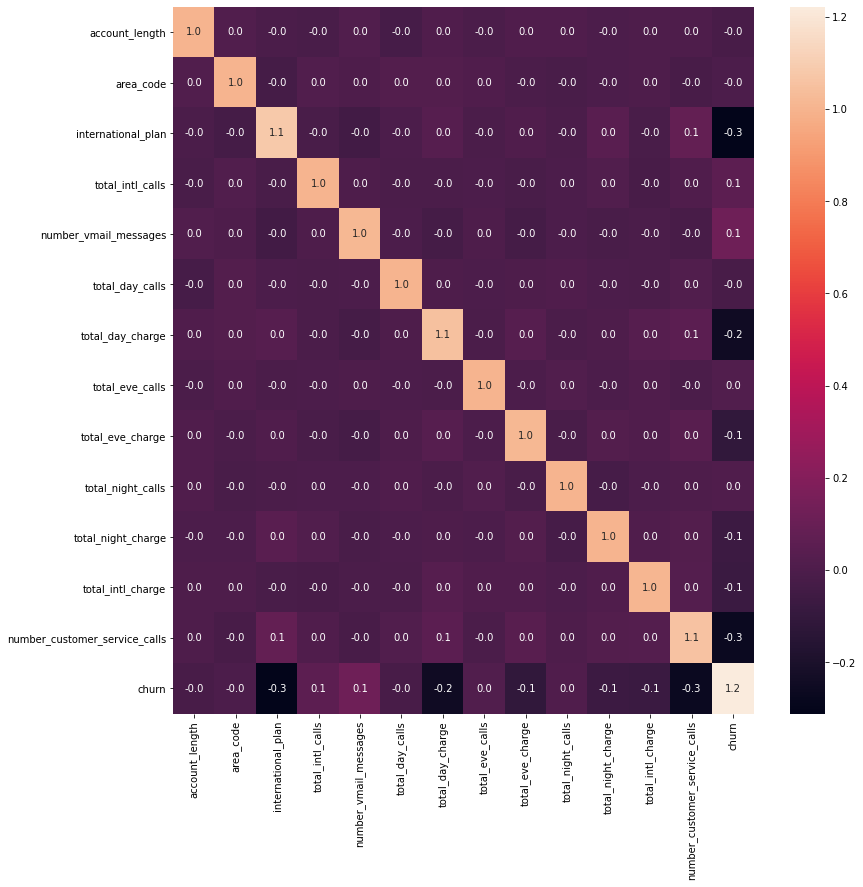

In [47]:
# create a dataframe showing the Variance Inflation Factor (VIF) scores
vif = pd.DataFrame(np.linalg.inv(corr.values), columns = corr.columns, index = corr.index)

# plot the heatmap
plt.figure(figsize = (13, 13))
sns.heatmap(vif, annot = True, fmt='.1f')
plt.show()

We don't see any VIF score of 5 and above, which means our dataset does not have high levels of multicollinearity. We are, therefore, good to go.

## <font color='#2F4F4F'>4. Data Modeling</font>

We will carry out 5 types of classification analysis, namely:
1. Logistic Regression
2. Gaussian Naive Bayes (NB) classification
3. Decision Trees Classification
4. K-Nearest Neighbors (KNN) Classification
5. Support Vector Machine (SVM) Classification

We will then compare the different classification models to assess the best performing one(s).

In [55]:
df.columns

Index(['account_length', 'area_code', 'international_plan', 'total_intl_calls',
       'number_vmail_messages', 'total_day_calls', 'total_day_charge',
       'total_eve_calls', 'total_eve_charge', 'total_night_calls',
       'total_night_charge', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [62]:
df.head()

,account_length,area_code,international_plan,total_intl_calls,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,0,3,0,123,12.05,73,18.01,73,10.62,2.86,3,0
1,137,510,0,7,0,86,38.01,139,20.81,81,4.24,2.57,0,0
2,103,408,0,6,29,95,50.10,105,20.17,127,13.51,3.70,1,0
3,99,415,0,2,0,123,36.86,88,10.74,82,9.93,4.24,1,0
4,108,415,0,4,0,78,33.56,101,10.54,107,9.20,2.08,2,0


In [64]:
# dividing our dataset into features (X) and target (y)

X = df.iloc[:,0:12].values
y = df['churn'].values

print(X.shape)
print(y.shape)

(5000, 12)
(5000,)


In [66]:
# splitting into 80-20 train-test sets

from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

In [68]:
# performing feature scaling on our training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fitting and transforming X_train while transforming X_test
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [69]:
# loading our classification libraries
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn.svm import SVC                         # SVM Classifier
from sklearn.naive_bayes import GaussianNB          # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier

# instantiating our classifiers
logistic_classifier = LogisticRegression(random_state = 0, solver='lbfgs')
decision_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
naive_classifier = GaussianNB()

# fitting our classifiers to the training data
logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
naive_classifier.fit(X_train, y_train)

# making predictions
logistic_y_prediction = logistic_classifier.predict(X_test) 
decision_y_prediction = decision_classifier.predict(X_test) 
svm_y_prediction = svm_classifier.predict(X_test) 
knn_y_prediction = knn_classifier.predict(X_test) 
naive_y_prediction = naive_classifier.predict(X_test)

In [70]:
# printing the classification report for each classifier to assess performance
from sklearn.metrics import classification_report,accuracy_score

# classification report for Logistic Regression
print("Logistic Regression classification report:")
print(str(accuracy_score(logistic_y_prediction, y_test)) + '\n')

# classification report for Gaussian Naive Bayes Classifier
print("Gaussian Naive Bayes classification report:")
print(str(accuracy_score(naive_y_prediction, y_test))+'\n')

# classification report for Decision Tree Classifier
print("Decision Tree classification report:")
print(str(accuracy_score(decision_y_prediction, y_test))+'\n')

# classification report for K-Nearest Neighbors Classifier
print("K-Nearest Neighbors classification report:")
print(str(accuracy_score(knn_y_prediction, y_test))+'\n')

# classification report for Support Vector Machine Classifier
print("Support Vector Machine classification report:")
print(str(accuracy_score(svm_y_prediction, y_test))+'\n')

Logistic Regression classification report:
0.857

Gaussian Naive Bayes classification report:
0.844

Decision Tree classification report:
0.859

K-Nearest Neighbors classification report:
0.872

Support Vector Machine classification report:
0.887



## <font color='#2F4F4F'>5. Summary of Findings</font>

1. Most of the data in the dataset is normally distributed.

2. The ratio of retained customers to those who churned very high at 4293:707. this is good for business but not good for our learning as it presents a biased dataset.

3. We had 3 area codes featured where data from area code 415 represents half of the data used for learning. It is no wonder that Area code 415 then had the highest number of customers who churned followed by code 510.

4. Very few customers are subscribed to International calling plans and further these churned more than those with the plan.

5. The customers who made less than 2 CX calls had the highest churn rate.

6. 4 pairs of features of customer data given below were found to have very high correlation and a member of each pair was thus dropped. 
  - 'total_day_minutes' and 'total_day_charge'
  - 'total_eve_minutes' and 'total_eve_charge'
  - 'total_night_minutes' and 'total_night_charge'
  - 'total_intl_minutes' and 'total_intl_charge' 

7. The key features that negatively influence customer churn for MTN africa, based on the dataset provided are Number of Customer Service Calls, (Sad because CX should work the other way), Internaltional plan, day charges, evening and night charges in that order.

8. *Different models have different accuracies, highest being SVM Classification Model at 88% accuracy followed by K-NN at 87%. Gaussian Naive Bayes  Classification comes at the bottom with 84%*


## <font color='#2F4F4F'>6. Recommendations</font>

1. We can compare the performance of the different models using other parameters.

2. With less than 90% accuracy for all models, we could look at other means of raising this to say as close to 100% as possible, probably by engineering the features or other tuning of the models.

## <font color='#2F4F4F'>7. Challenging your Solution</font>
Interesting observation during cleansing of the data was that in step two of the notebook we dropped two fields, Customer_ID and RecordID, which resulted to a loss of 7,892 records out of the total 12,892 customer records (which is very high i.e. 61%) leaving only 5,000 records.  Further investigations show that indeed we have unique 12,892 Customer_IDs and also the same number of unique RecordIDs. 

**Acknowledgements:**
* **[Project Data](https://bit.ly/MTNTelcoDataset ) and [Dataset Glossary](https://bit.ly/3gTideq) sources.** 
* Many thanks to [AfterWork Data Science](https://afterwork.ai/) Fellowship for the opportunity to train and exercise on this dataset.